In [1]:
# 各ライブラリのインポート
import numpy as np                # 数値計算ライブラリのnumpyをインポート
import pandas as pd               # データ操作ライブラリのpandasをインポート
import matplotlib.pyplot as plt   # データ可視化ライブラリのmatplotlibをインポート
import seaborn as sns             # データ可視化ライブラリのseabornをインポート
import warnings
warnings.simplefilter('ignore')

# 訓練データとテストデータの読み込み
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')  # 訓練データのCSVファイルを読み込み
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')   # テストデータのCSVファイルを読み込み

# 訓練データのサイズを表示し、最初の3行を表示
print(f'df_train.shape: {df_train.shape}')      # 訓練データの行数と列数を表示
display(df_train.head(3))                      # 訓練データの最初の3行を表示

# テストデータのサイズを表示し、最初の3行を表示
print(f'df_test.shape: {df_test.shape}')        # テストデータの行数と列数を表示
display(df_test.head(3))                       # テストデータの最初の3行を表示

data_origin=pd.concat([df_train,df_test])
data_origin.index = np.arange(1,2920)
data = data_origin

df_train.shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


df_test.shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [2]:
"""
from scipy.stats import norm       # SciPyライブラリから確率分布用のnormモジュールをインポート
from scipy import stats           # SciPyライブラリから統計関連の機能を提供するstatsモジュールをインポート

# 分析対象のデータを抽出して変数"data"に格納
# data変数を用いることにより、変数の入れ替えを楽にできます
data = df_train['SalePrice']       

# 目的変数（SalePrice）の基本統計量を表示
print('-'*10, 'describe', '-'*10)
print(round(data.describe(), 1))

# 目的変数の歪度と尖度を計算して表示
skewness = data.skew()
kurtosis = data.kurtosis()
print(f'歪度 (Skewness): {skewness:.2f}')
print(f'尖度 (Kurtosis): {kurtosis:.2f}')
#歪度の絶対値がおおよそ0.5を超える場合、データが正規分布から歪んでいる可能性がある。

# 2つのサブプロットを持つ図を作成
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# ヒストグラムと正規分布を表示するサブプロット
sns.histplot(data, stat='density', kde=True, ax=ax[0])
ax[0].set_title('histgram-seiki')
#histplotはヒストグラムを作成するときに使用される。
#stat='density'でグラフを密度関数に設定できる。つまり、x=0軸の間の面積の合計が「1」になる。
#kde=Trueとは、カーネル密度推定をヒストグラムに重ねて表示することを指定している。ここでは青線のこと。
#カーネル密度推定とは、正規分布か分からない数値に対して有限の標本店から全体の分布を推定する手法のこと。
#詳しくはこちら、https://club.informatix.co.jp/?p=1176
#ax=ax[0]で最初のサブプロットに設定をする

# x軸のラベルの文字サイズを調整
ax[0].tick_params(axis='x', labelsize=8)

xmin, xmax = ax[0].get_xlim()  # ax[0]の最大値と最小値を取得
x = np.linspace(xmin, xmax, 100) #xminからxmaxの間を100個に均等に分ける
p = norm.pdf(x, np.mean(data), np.std(data)) #norm.pdfで正規分布の確率密度関数（PDF）を計算。平均と標準偏差を使用して正規分布を作成
ax[0].plot(x, p, 'k', linewidth=1)

# 正規確率プロットを表示するサブプロット
res = stats.probplot(data, plot=ax[1]) #probplotとはデータの分布が正規分布に従っているかどうかを調べるプロット。プロットが一直線であれば正規分布に従うと考えられる。
ax[1].set_title('seiki-plot')

plt.tight_layout()  # グラフのレイアウトを調整

# グラフを表示
plt.show()
"""

'\nfrom scipy.stats import norm       # SciPyライブラリから確率分布用のnormモジュールをインポート\nfrom scipy import stats           # SciPyライブラリから統計関連の機能を提供するstatsモジュールをインポート\n\n# 分析対象のデータを抽出して変数"data"に格納\n# data変数を用いることにより、変数の入れ替えを楽にできます\ndata = df_train[\'SalePrice\']       \n\n# 目的変数（SalePrice）の基本統計量を表示\nprint(\'-\'*10, \'describe\', \'-\'*10)\nprint(round(data.describe(), 1))\n\n# 目的変数の歪度と尖度を計算して表示\nskewness = data.skew()\nkurtosis = data.kurtosis()\nprint(f\'歪度 (Skewness): {skewness:.2f}\')\nprint(f\'尖度 (Kurtosis): {kurtosis:.2f}\')\n#歪度の絶対値がおおよそ0.5を超える場合、データが正規分布から歪んでいる可能性がある。\n\n# 2つのサブプロットを持つ図を作成\nfig, ax = plt.subplots(1, 2, figsize=(10, 4))\n\n# ヒストグラムと正規分布を表示するサブプロット\nsns.histplot(data, stat=\'density\', kde=True, ax=ax[0])\nax[0].set_title(\'histgram-seiki\')\n#histplotはヒストグラムを作成するときに使用される。\n#stat=\'density\'でグラフを密度関数に設定できる。つまり、x=0軸の間の面積の合計が「1」になる。\n#kde=Trueとは、カーネル密度推定をヒストグラムに重ねて表示することを指定している。ここでは青線のこと。\n#カーネル密度推定とは、正規分布か分からない数値に対して有限の標本店から全体の分布を推定する手法のこと。\n#詳しくはこちら、https://club.informatix.co.jp

上記から以下のことが分かる
* 歪度 (skewness) の絶対値が 1.88 と高い
* ヒストグラムの正規分布線 (黒線) と KDE のズレが発生
* QQプロット線 (青線) が正規分布線 (赤線) からズレが発生

In [3]:
"""
# 散布図グラフの描画
ax = sns.scatterplot(data=df_train, x='GrLivArea', y='SalePrice')

# 以下の部分は解析には不要 (説明のための矢印をつけています)
# 注釈を追加
for i in range(2):
    idx = df_train['GrLivArea'].nlargest(2).index[i]

    # x軸の最大値を見つける
    max_x_values = df_train.loc[idx,'GrLivArea']
    max_y_value = df_train.loc[idx,'SalePrice']

    # 矢印を追加
    plt.annotate('', xy=(max_x_values, max_y_value), xytext=(max_x_values + 250, max_y_value + 100),
                 arrowprops=dict(color='red', arrowstyle='->'))

# さらに注釈を追加
plt.annotate('', xy=(2000, 250000), xytext=(1000, 100000),
             arrowprops=dict(color='yellow', arrowstyle='->', alpha=0.8, linewidth=5))

plt.show()
"""

"\n# 散布図グラフの描画\nax = sns.scatterplot(data=df_train, x='GrLivArea', y='SalePrice')\n\n# 以下の部分は解析には不要 (説明のための矢印をつけています)\n# 注釈を追加\nfor i in range(2):\n    idx = df_train['GrLivArea'].nlargest(2).index[i]\n\n    # x軸の最大値を見つける\n    max_x_values = df_train.loc[idx,'GrLivArea']\n    max_y_value = df_train.loc[idx,'SalePrice']\n\n    # 矢印を追加\n    plt.annotate('', xy=(max_x_values, max_y_value), xytext=(max_x_values + 250, max_y_value + 100),\n                 arrowprops=dict(color='red', arrowstyle='->'))\n\n# さらに注釈を追加\nplt.annotate('', xy=(2000, 250000), xytext=(1000, 100000),\n             arrowprops=dict(color='yellow', arrowstyle='->', alpha=0.8, linewidth=5))\n\nplt.show()\n"

In [4]:
"""
# Seabornのboxplotを作成
plt.figure(figsize=(16, 5))  # プロットのサイズを設定
sns.boxplot(data=df_train, x='YearBuilt', y='SalePrice')

# x軸ラベルの回転とプロットの表示
plt.xticks(rotation=90)

# グラフを表示
plt.show()
"""

"\n# Seabornのboxplotを作成\nplt.figure(figsize=(16, 5))  # プロットのサイズを設定\nsns.boxplot(data=df_train, x='YearBuilt', y='SalePrice')\n\n# x軸ラベルの回転とプロットの表示\nplt.xticks(rotation=90)\n\n# グラフを表示\nplt.show()\n"

In [5]:
"""
# Overall Qualityに基づく箱ひげ図を描画
sns.boxplot(data=df_train, x='OverallQual', y='SalePrice', fliersize=1)

# グラフを表示
plt.show()
"""

"\n# Overall Qualityに基づく箱ひげ図を描画\nsns.boxplot(data=df_train, x='OverallQual', y='SalePrice', fliersize=1)\n\n# グラフを表示\nplt.show()\n"

In [6]:
"""
df_train_num = df_train.select_dtypes(include="number")

# ヒートマップの作成だけなら下記だけで描画可能
sns.heatmap(df_train_num.corr())
plt.show()

# ----------------- 以下は見やすくする & 説明のための点線枠を追加した場合のコード ----------------
# 図（Figure）と軸（Axes）を作成
fig, ax = plt.subplots(figsize=(10, 8))

# ヒートマップを作成
sns.heatmap(df_train_num.corr(), cmap='viridis', annot=True, fmt='.1f', annot_kws={'fontsize': 5})

# 赤い点線の四角を追加
rect = plt.Rectangle((0.1, 36.9), 37.8, 0.9, edgecolor='red', linewidth=2, fill=False, linestyle='dashed')
ax.add_patch(rect)

# オレンジの点線の四角を追加
xy = [11.9, 25.9]
hw = [2.1, 2.1]

for i, v in enumerate(xy):
    x, y = xy[i], xy[i]
    height, width = hw[i], hw[i]
    rect = plt.Rectangle((x, y), height, width, edgecolor='orange', linewidth=2, fill=False, linestyle='dashed')
    ax.add_patch(rect)

# グラフを表示
plt.show()
"""

'\ndf_train_num = df_train.select_dtypes(include="number")\n\n# ヒートマップの作成だけなら下記だけで描画可能\nsns.heatmap(df_train_num.corr())\nplt.show()\n\n# ----------------- 以下は見やすくする & 説明のための点線枠を追加した場合のコード ----------------\n# 図（Figure）と軸（Axes）を作成\nfig, ax = plt.subplots(figsize=(10, 8))\n\n# ヒートマップを作成\nsns.heatmap(df_train_num.corr(), cmap=\'viridis\', annot=True, fmt=\'.1f\', annot_kws={\'fontsize\': 5})\n\n# 赤い点線の四角を追加\nrect = plt.Rectangle((0.1, 36.9), 37.8, 0.9, edgecolor=\'red\', linewidth=2, fill=False, linestyle=\'dashed\')\nax.add_patch(rect)\n\n# オレンジの点線の四角を追加\nxy = [11.9, 25.9]\nhw = [2.1, 2.1]\n\nfor i, v in enumerate(xy):\n    x, y = xy[i], xy[i]\n    height, width = hw[i], hw[i]\n    rect = plt.Rectangle((x, y), height, width, edgecolor=\'orange\', linewidth=2, fill=False, linestyle=\'dashed\')\n    ax.add_patch(rect)\n\n# グラフを表示\nplt.show()\n'

In [7]:
"""
#上記は全体的な傾向性を確認するのには、見やすいのですが、SalePriceの相関関係を見るには細かくなり過ぎてしまいます。
#そのため、SalePriceと相関係数の絶対値0.4以上の特徴量だけ抜き出してヒートマップを作成します。

df_train_num = df_train.select_dtypes(include="number")

threshold = 0.4  # 相関係数のしきい値

# 相関係数が絶対値0.4以上の特徴量を抜き出し、スコアの高い順にソート
high_corr_cols = df_train_num.corr()['SalePrice'][abs(df_train_num.corr()['SalePrice']) >= threshold].sort_values(ascending=False).index
#これはブールインデックスを用いた条件抽出をしている。df[特定の条件]をコードとして入力すると、その条件にTrueとなった値だけがdfとして出力される

# ヒートマップを作成
sns.heatmap(df_train_num[high_corr_cols].corr(), cmap='viridis', annot=True, fmt='.1f', annot_kws={'fontsize': 10})
plt.show()
"""

'\n#上記は全体的な傾向性を確認するのには、見やすいのですが、SalePriceの相関関係を見るには細かくなり過ぎてしまいます。\n#そのため、SalePriceと相関係数の絶対値0.4以上の特徴量だけ抜き出してヒートマップを作成します。\n\ndf_train_num = df_train.select_dtypes(include="number")\n\nthreshold = 0.4  # 相関係数のしきい値\n\n# 相関係数が絶対値0.4以上の特徴量を抜き出し、スコアの高い順にソート\nhigh_corr_cols = df_train_num.corr()[\'SalePrice\'][abs(df_train_num.corr()[\'SalePrice\']) >= threshold].sort_values(ascending=False).index\n#これはブールインデックスを用いた条件抽出をしている。df[特定の条件]をコードとして入力すると、その条件にTrueとなった値だけがdfとして出力される\n\n# ヒートマップを作成\nsns.heatmap(df_train_num[high_corr_cols].corr(), cmap=\'viridis\', annot=True, fmt=\'.1f\', annot_kws={\'fontsize\': 10})\nplt.show()\n'

ここから言えること
* SalePriceに対しては、14の特徴量が相関係数 0.4 以上
* 特徴量同士で相関係数が高い項目に関しては、片方を除外、もしくは、別の特徴量を検討
* GarageCarsが多ければ、GarageAreaが多いのも必然のためGarageAreaは除外
* GrLivArea(地上の生活エリア)が広ければ、TotRmsAbvGrd(地上の部屋数)も多くなるのが一般的なので、TotRmsAbvGrdは除外
* 車庫と建物が同時に建設されることが一般的なので、YearBuiltとGarageYrBitが相関が高くなっていると考えられるため、GarageYrBitは除外

In [8]:
"""
# DataFrameを結合
all_data = pd.concat([df_train, df_test])

# 欠損値の数を計算
missing_values_count = all_data.isnull().sum()

# 欠損値の数とパーセンテージを表形式で表示するためのDataFrameを作成
missing_values_table = pd.DataFrame({
    'Missing_total': missing_values_count,
    'Percent (%)': round((missing_values_count / len(all_data)) * 100, 1)
})

# 欠損値がある列の情報を抽出して降順でソート
df_missing = missing_values_table[missing_values_table['Missing_total'] > 0].sort_values(by='Missing_total', ascending=False)
    
# 欠損値がある列の情報を表示
display(df_missing)
"""

"\n# DataFrameを結合\nall_data = pd.concat([df_train, df_test])\n\n# 欠損値の数を計算\nmissing_values_count = all_data.isnull().sum()\n\n# 欠損値の数とパーセンテージを表形式で表示するためのDataFrameを作成\nmissing_values_table = pd.DataFrame({\n    'Missing_total': missing_values_count,\n    'Percent (%)': round((missing_values_count / len(all_data)) * 100, 1)\n})\n\n# 欠損値がある列の情報を抽出して降順でソート\ndf_missing = missing_values_table[missing_values_table['Missing_total'] > 0].sort_values(by='Missing_total', ascending=False)\n    \n# 欠損値がある列の情報を表示\ndisplay(df_missing)\n"

In [9]:
"""
# 図（Figure）のサイズを設定
plt.figure(figsize=(20, 4))

# Seabornを使用して箱ひげ図を作成
# x軸には "Neighborhood"、y軸には "LotFrontage" を設定
sns.boxplot(data=all_data, x='Neighborhood', y='LotFrontage')

# グラフを表示
plt.show()

#LotFrontage(通りに面している距離)は、地域差があると想定される
"""

'\n# 図（Figure）のサイズを設定\nplt.figure(figsize=(20, 4))\n\n# Seabornを使用して箱ひげ図を作成\n# x軸には "Neighborhood"、y軸には "LotFrontage" を設定\nsns.boxplot(data=all_data, x=\'Neighborhood\', y=\'LotFrontage\')\n\n# グラフを表示\nplt.show()\n\n#LotFrontage(通りに面している距離)は、地域差があると想定される\n'

In [10]:
"""
# 各地域（Neighborhood）ごとの "LotFrontage" の中央値を計算し、新しいデータフレームに保存
df_group = all_data.groupby(by='Neighborhood')['LotFrontage'].agg('median')

# 欠損値を埋めるための関数を定義
def fillnaLot(row):
    # もし "LotFrontage" が欠損値（NaN）または空文字列の場合
    if pd.isna(row['LotFrontage']) or row['LotFrontage'] == '':
        # 対応する地域（Neighborhood）の中央値で欠損値を埋める
        return df_group[row['Neighborhood']]
    else:
        # それ以外の場合、元の値を保持
        return row['LotFrontage']

# 訓練データとテストデータに対して "LotFrontage" の欠損値を埋める
datasets = [df_train, df_test]
for df in datasets:
    df['LotFrontage'] = df.apply(fillnaLot, axis=1)
"""

'\n# 各地域（Neighborhood）ごとの "LotFrontage" の中央値を計算し、新しいデータフレームに保存\ndf_group = all_data.groupby(by=\'Neighborhood\')[\'LotFrontage\'].agg(\'median\')\n\n# 欠損値を埋めるための関数を定義\ndef fillnaLot(row):\n    # もし "LotFrontage" が欠損値（NaN）または空文字列の場合\n    if pd.isna(row[\'LotFrontage\']) or row[\'LotFrontage\'] == \'\':\n        # 対応する地域（Neighborhood）の中央値で欠損値を埋める\n        return df_group[row[\'Neighborhood\']]\n    else:\n        # それ以外の場合、元の値を保持\n        return row[\'LotFrontage\']\n\n# 訓練データとテストデータに対して "LotFrontage" の欠損値を埋める\ndatasets = [df_train, df_test]\nfor df in datasets:\n    df[\'LotFrontage\'] = df.apply(fillnaLot, axis=1)\n'

In [11]:
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# 欠損値を 'None' で置き換える列のリスト
cols_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageType',
       'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2']
# 各データセットに対して、指定した列の欠損値を 'None' で置き換える
data[cols_none] = data[cols_none].fillna("None")

# 欠損値を 0 で置き換える列のリスト
cols_0 = ['GarageYrBlt', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1']
# 各データセットに対して、指定した列の欠損値を 0 で置き換える
data[cols_0] = data[cols_0].fillna(0)

# 欠損値を最頻値で置き換える列のリスト
cols_mode = ['MSZoning', 'Functional',  'Exterior2nd', 'Exterior1st', 'SaleType']
# 各データセットに対して、指定した列の欠損値を最頻値で置き換える
data[cols_mode] = data[cols_mode].fillna(data[cols_mode].mode())
data['MasVnrType'] = data['MasVnrType'].fillna("BrkFace")
data['Electrical'] = data['Electrical'].fillna("SBrkr")
data["KitchenQual"] = data["KitchenQual"].fillna("TA")

# 'Utilities' 列を削除する（Utilitiesは99.9%がAllPubなので列を削除します。）
data = data.drop('Utilities', axis=1)

In [12]:
"""
#順番が意味を成すデータ品質(*Qual)・状態(*Cond)等には、マップベースのカテゴリーエンコーディングを適用していきます。

# データセットリストを作成
datasets = [df_train, df_test]

# ラベル付けの対応を定義
label_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}  # ラベル対応の辞書

# ラベリングを行う列のリスト
cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

# データセットごとにラベリングを適用
for df in datasets:
    for col in cols:
        # 指定した辞書に基づいてラベルをマッピングし、整数型に変換
        df[col] = df[col].map(label_mapping).astype(int)
        #.mapはreplaceとほぼ同じ。ただ、速さを考えるとmapの方が高速。

# データセットリストを作成
datasets = [df_train, df_test]

# ラベル付けの対応を定義
label_mapping = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0}  # ラベル対応の辞書

# ラベリングを行う列のリスト
cols = ['BsmtExposure']

# データセットごとにラベリングを適用
for df in datasets:
    for col in cols:
        # 指定した辞書に基づいてラベルをマッピングし、整数型に変換
        df[col] = df[col].map(label_mapping).astype(int)

# データセットリストを作成
datasets = [df_train, df_test]

# ラベル付けの対応を定義
label_mapping = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0}  # ラベル対応の辞書

# ラベリングを行う列のリスト
cols = ['GarageFinish']

# データセットごとにラベリングを適用
for df in datasets:
    for col in cols:
        # 指定した辞書に基づいてラベルをマッピングし、整数型に変換
        df[col] = df[col].map(label_mapping).astype(int)

# データセットリストを作成
datasets = [df_train, df_test]

# ラベル付けの対応を定義
label_mapping = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0}  # ラベル対応の辞書

# ラベリングを行う列のリスト
cols = ['BsmtFinType1', 'BsmtFinType2']

# データセットごとにラベリングを適用
for df in datasets:
    for col in cols:
        # 指定した辞書に基づいてラベルをマッピングし、整数型に変換
        df[col] = df[col].map(label_mapping).astype(int)
"""

"\n#順番が意味を成すデータ品質(*Qual)・状態(*Cond)等には、マップベースのカテゴリーエンコーディングを適用していきます。\n\n# データセットリストを作成\ndatasets = [df_train, df_test]\n\n# ラベル付けの対応を定義\nlabel_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}  # ラベル対応の辞書\n\n# ラベリングを行う列のリスト\ncols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual',\n       'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']\n\n# データセットごとにラベリングを適用\nfor df in datasets:\n    for col in cols:\n        # 指定した辞書に基づいてラベルをマッピングし、整数型に変換\n        df[col] = df[col].map(label_mapping).astype(int)\n        #.mapはreplaceとほぼ同じ。ただ、速さを考えるとmapの方が高速。\n\n# データセットリストを作成\ndatasets = [df_train, df_test]\n\n# ラベル付けの対応を定義\nlabel_mapping = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0}  # ラベル対応の辞書\n\n# ラベリングを行う列のリスト\ncols = ['BsmtExposure']\n\n# データセットごとにラベリングを適用\nfor df in datasets:\n    for col in cols:\n        # 指定した辞書に基づいてラベルをマッピングし、整数型に変換\n        df[col] = df[col].map(label_mapping).astype(int)\n\n# データセットリストを作成\ndatasets = [df_train, df_tes

In [13]:
label_encode_list = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual',
                     'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
qal_object = ["Ex","Gd","TA","Fa","Po","No"]
qal_float = [5,4,3,2,1,0]
data[label_encode_list] = data[label_encode_list].replace(qal_object,qal_float)

qal_object_garage = ["Fin","RFn","Unf","No"]
qal_float_garage = [3,2,1,0]
data["GarageFinish"] = data["GarageFinish"].replace(qal_object_garage,qal_float_garage)

qal_object_bsmt = ["GLQ","ALQ","BLQ","Rec","LwQ","Unf","No"]
qal_float_bsmt = [6,5,4,3,2,1,0]
data[["BsmtFinType1","BsmtFinType2"]] = data[["BsmtFinType1","BsmtFinType2"]].replace(qal_object_bsmt,qal_float_bsmt)

qal_object_expo = ["Gd","Av","Mn","No","None"]
qal_float_expo = [4,3,2,1,0]
data["BsmtExposure"] = data["BsmtExposure"].replace(qal_object_expo,qal_float_expo)


skew: 0.12
kurt: 0.81


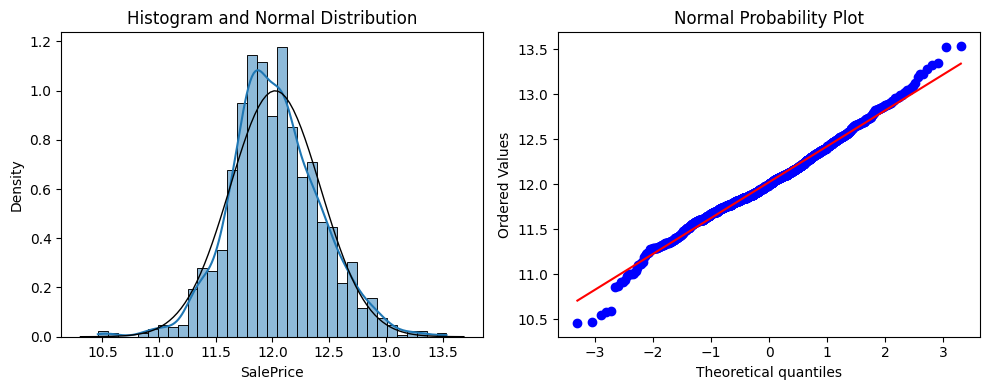

In [14]:
from scipy.stats import norm       # SciPyライブラリから確率分布用のnormモジュールをインポート
from scipy import stats           # SciPyライブラリから統計関連の機能を提供するstatsモジュールをインポート

#分布の歪みがある場合は、対数変換などの方法を検討してデータを正規化することで、モデルの学習や予測の精度向上が期待できます。
#SalePriceに対数変換を適用し、歪度・ヒストグラム・QQプロットを確認します。

# SalePriceの対数変換
df_train['SalePrice'] = np.log(df_train['SalePrice'])

# 分析対象のデータを抽出して変数"data"に格納
data_price = df_train['SalePrice']

# サブプロットを作成
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# 歪度と尖度を計算して表示
skewness = data_price.skew()
kurtosis = data_price.kurtosis()
print(f'skew: {skewness:.2f}')  # 歪度を表示
print(f'kurt: {kurtosis:.2f}')  # 尖度を表示

# ヒストグラムと正規分布曲線の表示
sns.histplot(data_price, stat='density', kde=True, ax=ax[0])
ax[0].set_title('Histogram and Normal Distribution')

xmin, xmax = ax[0].get_xlim()  # ax[0]の最大値と最小値を取得
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(data_price), np.std(data_price))
ax[0].plot(x, p, 'k', linewidth=1)

# 正規確率プロットの表示
res = stats.probplot(data_price, plot=ax[1])
ax[1].set_title('Normal Probability Plot')

plt.tight_layout()  # グラフのレイアウトを調整
plt.show()

すると、以下3項目全て改善しています。

* 歪度がほぼ０
* ヒストグラムのKDEと正規分布線がほぼ重なる
* QQプロットの青線が正規分布線 (赤線) 上

In [15]:

#住宅価格には、住居の総面積が関係するため、地下・１階・２階の面積を合計した新たな特徴量を作成します。

print(f"Before making: {data.shape}")

# 新しい特徴量 'TotalSF' を追加し、'TotalBsmtSF'、'1stFlrSF'、'2ndFlrSF' を合計して代入
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

# 変更後のデータフレームの形状を表示
print(f"After making: {data.shape}")


Before making: (2919, 80)
After making: (2919, 81)


In [16]:

#歪度の削減の手法を用いていきます。そのため、まずは現状の歪度が高いもの (0.75以上) を抽出します。

from scipy.stats import skew

# 数値変数を特定
numeric_feats = data.dtypes[data.dtypes != "object"].index

# 各数値変数の歪度を計算し、降順にソート
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# 歪度を含むデータフレームの作成
skewness = pd.DataFrame({'Skew' :skewed_feats})

# 最も歪んでいる数値変数の上位10件を表示
display(skewness.head(10))

# 歪度の絶対値が0.75より大きい特徴量を選択
skewness = skewness[abs(skewness) > 0.75]

# 歪度が0.75より小さい特徴量を削除
skewness = skewness.dropna(axis=0)

# Box-Cox変換が必要な歪んだ数値特徴量の数を表示
print(f"There are {skewness.shape[0]} skewed numerical features to Box Cox transform")


,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694
BsmtHalfBath,3.931594


There are 28 skewed numerical features to Box Cox transform


In [17]:

#歪度の絶対値が0.75以上のものに対してBox-Cox変換を適用していきます
from scipy.special import boxcox1p

# Box-Cox変換を適用する数値変数の列を特定
indices = skewness.index

# 新しい列を格納するための空のリストを作成
skewness_after_boxcox = []

# Box-Cox変換のパラメータ（ラムダ）を設定
lam = 0.15

# 各数値変数に対してBox-Cox変換を適用し、新しい列として追加
for idx in indices:
    transformed_values = boxcox1p(data[idx], lam)
    data[idx] = transformed_values
    # Box-Cox変換後の歪度を計算し、リストに追加
    skewness_after_boxcox.append(skew(transformed_values))

# skewnessデータフレームにBox-Cox変換後の歪度を追加
skewness['Skew_BoxCox'] = skewness_after_boxcox

# Box-Cox変換後の歪度を表示
display(skewness.head(10))

,Skew,Skew_BoxCox
MiscVal,21.947195,5.597060
PoolArea,16.898328,15.119426
LotArea,12.822431,0.210453
LowQualFinSF,12.088761,8.744143
3SsnPorch,11.376065,8.924822
KitchenAbvGr,4.302254,3.698825
BsmtFinSF2,4.146143,2.564481
EnclosedPorch,4.003891,2.025461
ScreenPorch,3.946694,2.978396
BsmtHalfBath,3.931594,3.788243


In [18]:
data_price=data["SalePrice"]

data_obj = data.select_dtypes(include=object)
data_obj_dummy = pd.get_dummies(data_obj,dtype=int)

data_number = data.select_dtypes(include="number")
data_number = data_number.drop("SalePrice",axis=1)

data_train = data_obj_dummy.join(data_price)
data = data_train.join(data_number)

df_train = data.loc[data["SalePrice"].notna()]
df_test = data.loc[data["SalePrice"].isna()]

In [19]:
"""
#One-Hot Encodingを適用していきます。カテゴラル変数のエンコーディングのところで、列数膨大化のため後回しにした対応
# トレーニングデータの行数を取得
ntrain = len(df_train)

# ワンホットエンコーディングを実行
all_data = pd.get_dummies(all_data)

# トレーニングデータとテストデータに分割
df_train = all_data[:ntrain]  # 最初のntrain行はトレーニングデータ
df_test = all_data[ntrain:]   # 残りはテストデータ

# テストデータから 'SalePrice' 列を削除
df_test = df_test.drop(['SalePrice'], axis=1)

# トレーニングデータの形状を表示
print(f'df_train.shape: {df_train.shape}')  # テストデータの行数と列数を表示
display(df_train.head(3))  # テストデータの最初の3行を表示

# テストデータの形状を表示
print(f'df_test.shape: {df_test.shape}')  # テストデータの行数と列数を表示
display(df_test.head(3))  # テストデータの最初の3行を表示
"""

"\n#One-Hot Encodingを適用していきます。カテゴラル変数のエンコーディングのところで、列数膨大化のため後回しにした対応\n# トレーニングデータの行数を取得\nntrain = len(df_train)\n\n# ワンホットエンコーディングを実行\nall_data = pd.get_dummies(all_data)\n\n# トレーニングデータとテストデータに分割\ndf_train = all_data[:ntrain]  # 最初のntrain行はトレーニングデータ\ndf_test = all_data[ntrain:]   # 残りはテストデータ\n\n# テストデータから 'SalePrice' 列を削除\ndf_test = df_test.drop(['SalePrice'], axis=1)\n\n# トレーニングデータの形状を表示\nprint(f'df_train.shape: {df_train.shape}')  # テストデータの行数と列数を表示\ndisplay(df_train.head(3))  # テストデータの最初の3行を表示\n\n# テストデータの形状を表示\nprint(f'df_test.shape: {df_test.shape}')  # テストデータの行数と列数を表示\ndisplay(df_test.head(3))  # テストデータの最初の3行を表示\n"

In [20]:
# 必要なライブラリをインポート
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

# 説明変数と目的変数を選択
X = df_train.drop(['Id', 'SalePrice'], axis=1)
y = df_train['SalePrice']

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデルの構築と学習
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=1.0),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    XGBRegressor(),
    LGBMRegressor()
]

# 結果を保存するためのデータフレームを作成
results = pd.DataFrame(columns=['Model', 'MSE'])

# 各モデルに対して学習と評価を行うループ
for model in models:
    model_name = model.__class__.__name__  # モデルの名前を取得
    model.fit(X_train, y_train)  # モデルの学習
    y_pred = model.predict(X_test)  # 予測
    
    mse = mean_squared_error(y_test, y_pred)  # 平均二乗誤差を計算
    
    # 結果をデータフレームに登録
    results = pd.concat([results, pd.DataFrame({'Model': [model_name], 'MSE': [mse]})], ignore_index=True)

# MSEによって結果をソート
results = results.sort_values(by='MSE')

# 結果を出力
display(results)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3460
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 179
[LightGBM] [Info] Start training from score 33.919944


,Model,MSE
1,Ridge,5.956994e-01
6,LGBMRegressor,6.787816e-01
5,XGBRegressor,7.099704e-01
4,RandomForestRegressor,7.589941e-01
3,DecisionTreeRegressor,1.521143e+00
2,Lasso,2.658552e+00
0,LinearRegression,9.502469e+13


In [21]:
from sklearn.model_selection import GridSearchCV

# 開始値（最小値）と終了値（最大値）を指定
start_alpha = 0.01
end_alpha = 100

# 生成する値の個数を指定
num_values = 20

# 対数スケールでalphaの値を生成
alphas = np.logspace(np.log10(start_alpha), np.log10(end_alpha), num=num_values)

# Ridge回帰モデルを作成
ridge = Ridge()

# グリッドサーチのパラメータグリッドを定義
param_grid = {'alpha': alphas}

# クロスバリデーションとグリッドサーチを組み合わせて最適なalphaを探索
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 最適なalphaを表示
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

Best alpha: 14.38449888287663


In [22]:
# 最適なalphaでRidge回帰モデルを再訓練
model = Ridge(alpha=best_alpha).fit(X, y)
id_test = df_test["Id"]
df_test = df_test.drop(['Id', 'SalePrice'], axis=1)

# テストデータに対して予測を行い、exp(x) - 1を適用して元のスケールに戻す
sub_pred = np.expm1(model.predict(df_test))

# 提出用のデータフレームを作成
submission = pd.DataFrame({'Id': id_test, 'SalePrice': sub_pred})
submission

,Id,SalePrice
1461,1461,5.506319e+13
1462,1462,3.782724e+14
1463,1463,9.017333e+14
1464,1464,1.466994e+15
1465,1465,1.381450e+15
...,...,...
2915,2915,1.263816e+13
2916,2916,8.165171e+12
2917,2917,5.487399e+14
2918,2918,6.141482e+13


In [23]:
submission.to_csv("submission.csv", index=False)